<a href="https://colab.research.google.com/github/jinhyukbae/playdata/blob/main/%EC%A0%9C%EC%A3%BC%EB%8F%84%EA%B5%90%ED%86%B5%EB%9F%89%EB%8D%B0%EC%9D%B4%ED%84%B0%EC%95%8C%EA%B3%A0%EB%A6%AC%EC%A6%985%EA%B0%9C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#!pip install matplotlib --upgrade

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.core.dtypes.common import is_numeric_dtype


In [3]:
df = pd.read_csv('train.csv')
df

,day_of_week,base_hour,lane_count,road_rating,road_name,connect_code,maximum_speed_limit,vehicle_restricted,weight_restricted,height_restricted,road_type,start_node_name,start_latitude,start_longitude,start_turn_restricted,end_node_name,end_latitude,end_longitude,end_turn_restricted,target
0,목,17,1,106,지방도1112호선,0,60.0,0.0,32400.0,0.0,3,제3교래교,33.427747,126.662612,없음,제3교래교,33.427749,126.662335,없음,52.0
1,목,21,2,103,일반국도11호선,0,60.0,0.0,0.0,0.0,0,광양사거리,33.500730,126.529107,있음,KAL사거리,33.504811,126.526240,없음,30.0
2,일,7,2,103,일반국도16호선,0,80.0,0.0,0.0,0.0,0,창고천교,33.279145,126.368598,없음,상창육교,33.280072,126.362147,없음,61.0
3,금,13,2,107,태평로,0,50.0,0.0,0.0,0.0,0,남양리조트,33.246081,126.567204,없음,서현주택,33.245565,126.566228,없음,20.0
4,화,8,2,103,일반국도12호선,0,80.0,0.0,0.0,0.0,0,애월샷시,33.462214,126.326551,없음,애월입구,33.462677,126.330152,없음,38.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,목,2,2,107,중앙로,0,60.0,0.0,0.0,0.0,0,한남투자,33.252712,126.561124,없음,김약국,33.247607,126.561943,없음,31.0
49996,토,19,2,103,일반국도11호선,0,60.0,0.0,0.0,0.0,0,영주교,33.305359,126.598914,없음,하례입구삼거리,33.300796,126.600332,없음,50.0
49997,목,1,2,103,일반국도12호선,0,80.0,0.0,0.0,0.0,0,오돌또기,33.476123,126.382742,없음,구엄교,33.477747,126.387803,없음,57.0
49998,일,1,2,103,일반국도12호선,0,70.0,0.0,0.0,0.0,0,청송낚시,33.263593,126.623204,있음,효례교,33.263624,126.623943,없음,47.0


# 데이터 개요
  - id: 칼럼id -제거-
  - base_date: 날짜     -제거-
  - day_of_week: 요일         라벨로 변경
  - base_hour: 시간대
  - lane_count: 차로수
  - road_rating: 도로 등급       (106:지방도,103:일반국도,107:시도,군도)로 구성
  - road_name: 도로 이름
  - multi_linked: 중용구간 여부(0,1)로 구성  ->0개수:4698978 1개수:2239 -제거-
  - connect_code: 연결로 코드         (0,103)로 구성
  - maximum_speed_limit: 최고속도 제한       타겟과의 상관 관계가 제일 높음
  - vehicle_restricted: 통과제한 차량   (값이 한개임) -제거-
  - weight_restricted: 통과제한 하중         타겟과의 상관 관계가 두번째로 높음
  - height_restricted: 통과 제한 높이    (값이 한개임) -제거-
  - road_type: 도로 유형                     (0,3) 으로 구성 타겟과의 상관 관계가 세번재로 높음
  - start_node_name: 시작지점명            온핫 인코딩 사용?
  - start_latitude: 시작지점 위도
  - start_longitude: 시작지점 경도
  - start_turn_restricted: 시작 지점의 회전제한 유무      (있음,없음)으로 구성
  - end_node_name: 도착지점명             온핫 인코딩 사용?
  - end_latitude: 도착지점 위도
  - end_longitude: 도착지점 경도
  - end_turn_restricted: 도착 지점의 회전제한 유무    (있음,없음)으로 구성
  - target: 평균속도(km)


  1. 참조 https://www.law.go.kr/LSW/admRulInfoP.do?admRulSeq=2100000157569  (도로 규정)
  2. 참조 https://tttsss77.tistory.com/147 (위도, 경도로 지도 찾기)
  3. 참조 https://velog.io/@eodud0582/Folium 지도위에 표시(위도,경도 이용)
  4. 참조 https://bskyvision.com/entry/python-%EC%A3%BC%EC%86%8C%EB%A5%BC-%EC%9C%84%EB%8F%84-%EA%B2%BD%EB%8F%84-%EC%A2%8C%ED%91%9C%EB%A1%9C-%EB%B0%94%EA%BF%94%EC%A3%BC%EB%8A%94-Geocoder-API-%EC%82%AC%EC%9A%A9%EB%B2%95 도로명 주소로 (위도,경도 찾기)

In [4]:
df.drop(df[['height_restricted']],axis=1,inplace=True)

In [5]:
df['connect_code'].unique()

array([  0, 103])

# EDA

In [6]:
def EDA(var,explode):
  plt.figure(figsize=(25,7))

  plt.subplot(1,2,1)
  plt.pie(df[var].value_counts(),labels=df[var].value_counts().index, autopct="%.0f%%",
          shadow = True,
          explode = explode
          )
  plt.title("{} chart".format(var), fontsize=25)

  plt.subplot(1,2,2)
  ax = sns.barplot(df[var], df.target)
  for bars in ax.containers:
    ax.bar_label(bars)
    plt.title("{} chart".format(var), fontsize=25)

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


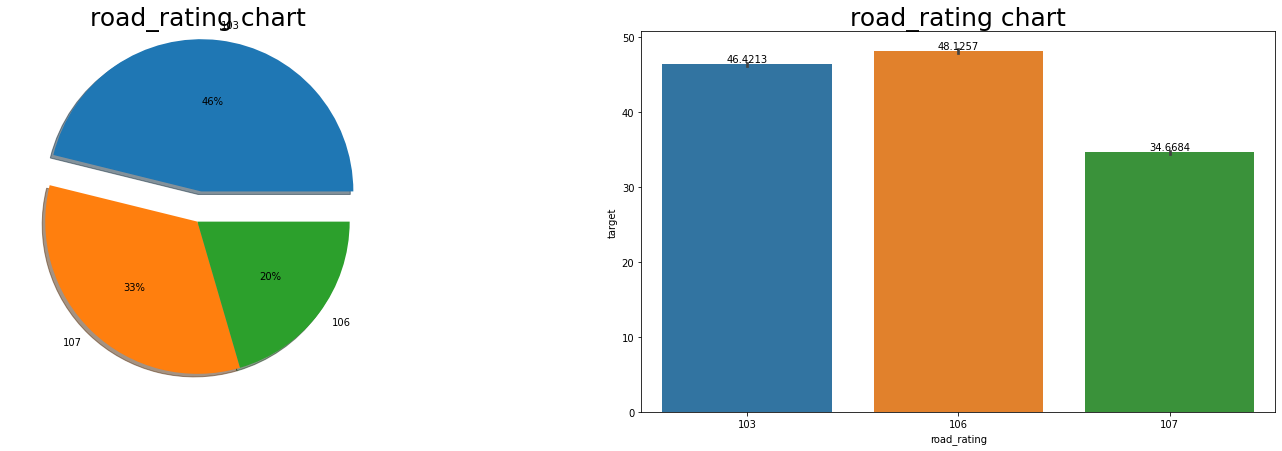

In [7]:
EDA("road_rating",[0.2,0,0])

# 103번도로 이용 46% 107번 도로 33% 106번도로 20% 이용
# 106번 도로 평균속도 48km 103번도로 46km 107번도로 34km

In [8]:
df['road_name'].value_counts()

일반국도12호선    11240
-            5966
일반국도16호선     5842
일반국도95호선     2639
일반국도11호선     2261
            ...  
아봉로            90
애원로            87
남조로            82
호서중앙로          32
호근로             7
Name: road_name, Length: 61, dtype: int64

In [9]:
df.head()

,day_of_week,base_hour,lane_count,road_rating,road_name,connect_code,maximum_speed_limit,vehicle_restricted,weight_restricted,road_type,start_node_name,start_latitude,start_longitude,start_turn_restricted,end_node_name,end_latitude,end_longitude,end_turn_restricted,target
0,목,17,1,106,지방도1112호선,0,60.0,0.0,32400.0,3,제3교래교,33.427747,126.662612,없음,제3교래교,33.427749,126.662335,없음,52.0
1,목,21,2,103,일반국도11호선,0,60.0,0.0,0.0,0,광양사거리,33.500730,126.529107,있음,KAL사거리,33.504811,126.526240,없음,30.0
2,일,7,2,103,일반국도16호선,0,80.0,0.0,0.0,0,창고천교,33.279145,126.368598,없음,상창육교,33.280072,126.362147,없음,61.0
3,금,13,2,107,태평로,0,50.0,0.0,0.0,0,남양리조트,33.246081,126.567204,없음,서현주택,33.245565,126.566228,없음,20.0
4,화,8,2,103,일반국도12호선,0,80.0,0.0,0.0,0,애월샷시,33.462214,126.326551,없음,애월입구,33.462677,126.330152,없음,38.0


In [10]:
df['start_node_name'].unique()

array(['제3교래교', '광양사거리', '창고천교', '남양리조트', '애월샷시', '시청입구2', '가동', '외도천교',
       '신성교회', '양수장', '노루생이', '선경오피스텔', '명도암교차로', '서홍교', '송목교', '아라초등학교앞',
       '그랜드호텔사거', '중산간서로6091', '광령3교차로', '오조한도교입구', '종합운동장입구사거리',
       '동부장의운수사', '양천동', '한솔고기국수', '제5산록교', '강정교', '어시천교', '광평교차로',
       '버으내교차로', '일호유리', '남수교', '남읍학교살리기다가구', '거로마을', '서현주택', '명월교',
       '연동사거리', '제주일보사거리', '인다마을', '창성세차장', '오당빌레길1', '수복당', '해안동804-4',
       '노을과포도향기', '다이소제주화북점', '수장교', '동광램프(서귀포)', '경마장교', '난산사거리', '미수2교',
       '동중입구', '창천교', '수모루교차로', '성읍교차로', '오봉교', '아라주공아파트', '고성교차로',
       '서호2차현대맨션203동', '김약국', '국립제주박물관', '서귀포경찰서', '동홍사거리', '제2성읍교',
       '하귀입구', '서원', '동광2교차로', '진은교', '성읍사거리', '수협중앙회', '부영아파트', '청상어식당',
       '농협하나로마트', '봉좌교', '제4교래교', '양계장', '쉬는팡교차로', '한라교', '중문한의원',
       '월림삼거리', '평대초교앞', '세훈빌리지', '제1해안교', '상효2교', '뉴본아파트', '어리목입구',
       'BYC', '연수동삼거리', '농협창고', '제2거로교', '제2봉성교', '광명제2교차로', '경동보일러',
       '구엄교', '색달동마을', '어승생삼거리', '난지농업연구소삼거리', '정방수퍼', '중앙여고사거리', '제2의귀교',
       '거

In [11]:
df[df['road_name'] == '중정로'] 

,day_of_week,base_hour,lane_count,road_rating,road_name,connect_code,maximum_speed_limit,vehicle_restricted,weight_restricted,road_type,start_node_name,start_latitude,start_longitude,start_turn_restricted,end_node_name,end_latitude,end_longitude,end_turn_restricted,target
11,일,2,1,107,중정로,0,50.0,0.0,0.0,0,선경오피스텔,33.248505,126.569797,없음,정방수퍼,33.248633,126.567766,없음,40.0
64,일,14,1,107,중정로,0,50.0,0.0,0.0,0,김약국,33.247607,126.561943,없음,BYC,33.248491,126.566092,있음,29.0
97,일,17,1,107,중정로,0,50.0,0.0,0.0,0,BYC,33.248491,126.566092,있음,김약국,33.247607,126.561943,없음,21.0
212,금,18,1,107,중정로,0,50.0,0.0,0.0,0,BYC,33.248491,126.566092,있음,정방수퍼,33.248633,126.567766,없음,9.0
271,토,10,1,107,중정로,0,50.0,0.0,0.0,0,BYC,33.248491,126.566092,있음,정방수퍼,33.248633,126.567766,없음,28.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,금,12,1,107,중정로,0,50.0,0.0,0.0,0,김약국,33.247607,126.561943,없음,BYC,33.248491,126.566092,있음,22.0
48956,토,3,1,107,중정로,0,50.0,0.0,0.0,0,BYC,33.248491,126.566092,있음,정방수퍼,33.248633,126.567766,없음,33.0
49106,일,14,1,107,중정로,0,50.0,0.0,0.0,0,BYC,33.248491,126.566092,있음,정방수퍼,33.248633,126.567766,없음,33.0
49429,월,23,1,107,중정로,0,50.0,0.0,0.0,0,선경오피스텔,33.248505,126.569797,없음,정방수퍼,33.248633,126.567766,없음,30.0


In [12]:
df['road_name'] = df['road_name'].str.replace("-","")

In [13]:
df[df['road_name'] == ''] 

,day_of_week,base_hour,lane_count,road_rating,road_name,connect_code,maximum_speed_limit,vehicle_restricted,weight_restricted,road_type,start_node_name,start_latitude,start_longitude,start_turn_restricted,end_node_name,end_latitude,end_longitude,end_turn_restricted,target
6,목,0,2,107,,0,60.0,0.0,0.0,0,가동,33.418412,126.268029,없음,나동,33.414175,126.269378,없음,39.0
14,목,16,1,107,,0,60.0,0.0,43200.0,3,송목교,33.316913,126.624634,없음,송목교,33.317065,126.623867,없음,58.0
28,일,14,2,107,,0,50.0,0.0,0.0,0,광평교차로,33.330822,126.354179,없음,금악,33.330673,126.354987,없음,59.0
30,목,6,2,107,,0,80.0,0.0,0.0,0,일호유리,33.472276,126.418443,없음,상귀교차로,33.473390,126.409129,없음,75.0
31,목,15,1,107,,0,60.0,0.0,43200.0,3,남수교,33.337244,126.695809,없음,남수교,33.337398,126.696117,없음,36.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49943,수,15,1,107,,0,60.0,0.0,0.0,0,가는질,33.356829,126.264075,없음,우사,33.358358,126.271652,없음,54.0
49945,금,15,2,107,,0,80.0,0.0,0.0,0,광삼교,33.472505,126.424368,없음,일호유리,33.472276,126.418443,없음,56.0
49947,금,19,2,107,,0,50.0,0.0,0.0,0,창성세차장,33.409416,126.259139,없음,한림어촌계,33.411255,126.257313,없음,28.0
49954,금,13,2,107,,0,50.0,0.0,0.0,0,한림수협냉동창고,33.415529,126.261797,없음,한수풀횟집,33.413560,126.259693,없음,34.0


In [14]:
df.describe(include='O').columns

Index(['day_of_week', 'road_name', 'start_node_name', 'start_turn_restricted',
       'end_node_name', 'end_turn_restricted'],
      dtype='object')

# 인코딩

In [15]:
from pandas.core.dtypes.common import is_numeric_dtype


In [16]:
x = df.drop(df[['target']],axis=1)
y = df[['target']]

In [17]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for column in x.columns:
  if is_numeric_dtype(x[column]): # X의 컬럼 타입을 정수형으로 바꿈
    continue
  x[column] = le.fit_transform(x[column])

In [18]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.3, random_state=1
)

In [19]:
from sklearn.preprocessing import MinMaxScaler
mmscaler = MinMaxScaler()
x[column] = mmscaler.fit_transform(x[[column]])
x.head()

,day_of_week,base_hour,lane_count,road_rating,road_name,connect_code,maximum_speed_limit,vehicle_restricted,weight_restricted,road_type,start_node_name,start_latitude,start_longitude,start_turn_restricted,end_node_name,end_latitude,end_longitude,end_turn_restricted
0,1,17,1,106,46,0,60.0,0.0,32400.0,3,386,33.427747,126.662612,0,386,33.427749,126.662335,0.0
1,1,21,2,103,34,0,60.0,0.0,0.0,0,32,33.500730,126.529107,1,2,33.504811,126.526240,0.0
2,4,7,2,103,36,0,80.0,0.0,0.0,0,426,33.279145,126.368598,0,179,33.280072,126.362147,0.0
3,0,13,2,107,57,0,50.0,0.0,0.0,0,58,33.246081,126.567204,0,203,33.245565,126.566228,0.0
4,6,8,2,103,35,0,80.0,0.0,0.0,0,267,33.462214,126.326551,0,269,33.462677,126.330152,0.0


# 모델링

In [20]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.3, random_state=1
)

In [21]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# 랜덤포레스트

In [22]:
from sklearn.ensemble import RandomForestRegressor
RFR=RandomForestRegressor()
RFR.fit(x_train,y_train)
Random_pred = RFR.predict(x_test)
RFR_training_score = RFR.score(x_train,y_train)
RFR_test_score = RFR.score(x_test,y_test)
print("RFR_training_score",RFR_training_score)
print("RFR_test_score",RFR_test_score)
RFR_r2 = r2_score(y_test,Random_pred) 
print("RFR_r2_score",RFR_r2)

<ipython-input-22-bf00b05457d9>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RFR.fit(x_train,y_train)


RFR_training_score 0.9750189196280467
RFR_test_score 0.8660164153152788
RFR_r2_score 0.8660164153152788


In [23]:
# !pip install catboost

# xgb

In [27]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import xgboost as xg
xgb = xg.XGBRegressor(n_estimators=100,max_depth=100)
xgb.fit(x_train,y_train)
xgb_predict = xgb.predict(x_test)
xgb_mse = mean_squared_error(y_test,xgb_predict)
xgb_mae = mean_absolute_error(y_test,xgb_predict)
xgb_r2 = r2_score(y_test,xgb_predict)
xgb_training_score = xgb.score(x_train,y_train)
xgb_testing_score = xgb.score(x_test,y_test)
print("mse",xgb_mse)
print("mae",xgb_mae)
print("r2_score",xgb_r2)
print("xgb_training_score",xgb_training_score)
print("xgb_testing_score",xgb_testing_score)

[00:36:16] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
mse 39.939132399152186
mae 4.4704792123794554
r2_score 0.843571755530833
xgb_training_score 0.9899250116783479
xgb_testing_score 0.843571755530833


In [ ]:
# -가 뜨면 과적합 
# cat_training_score = cat.score(x_train,y_train)
# cat_testing_score = cat.score(x_test,y_test)
# cat_training_score, cat_testing_score

In [ ]:
# print("catmse",cat_mse)
# print("xgbmse",xgb_mse)
# print("catmae",cat_mae)
# print("xgbmae",xgb_mae)
# print("xgb_r2_score",xgb_r2)
# print("cat_r2",cat_r2)

# ada

In [28]:
from sklearn.ensemble import AdaBoostRegressor

In [29]:
adaBoost = AdaBoostRegressor(n_estimators=100,
                             learning_rate=1.0,
                             loss='linear',
                             random_state=1
                            
                             )

In [30]:
adaBoost.fit(x_train,y_train)
adaBoost_predict = adaBoost.predict(x_test)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [31]:
adaBoost_mse = mean_squared_error(y_test,adaBoost_predict)
adaBoost_mae = mean_absolute_error(y_test,adaBoost_predict)
adaBoost_r2 = r2_score(y_test,adaBoost_predict)
adaBoost_training_score = adaBoost.score(x_train,y_train)
adaBoost_testing_score = adaBoost.score(x_test,y_test)
print("mse",adaBoost_mse)
print("mae",adaBoost_mae)
print("r2_score",adaBoost_r2)
print("adaBoost_training_score",adaBoost_training_score )
print("adaBoost_testing_score",adaBoost_testing_score)

mse 116.23272054198083
mae 8.822335965680619
r2_score 0.544755247997242
adaBoost_training_score 0.5443266512567057
adaBoost_testing_score 0.544755247997242


# knn

In [32]:
from sklearn.neighbors import KNeighborsRegressor

In [33]:
knn=KNeighborsRegressor(n_neighbors=3)

In [34]:
knn.fit(x_train,y_train)

KNeighborsRegressor(n_neighbors=3)

In [35]:
knn_pred=knn.predict(x_test)

In [36]:
knn_mse = mean_squared_error(y_test,knn_pred) #진짜값 knn모델을 쓴 예측값
knn_mae = mean_absolute_error(y_test,knn_pred) #진짜값 knn모델을 쓴 예측값
knn_r2 = r2_score(y_test,knn_pred) #진짜값 knn모델을 쓴 예측값
print("mse",knn_mse)
print("mae",knn_mae)
print("r2score",knn_r2)

mse 41.65654074074073
mae 4.6231333333333335
r2score 0.836845240562343


In [37]:
knn_training_score = knn.score(x_train,y_train)
knn_training_score

0.9197008724918645

In [38]:
knn_testing_score = knn.score(x_test,y_test)
knn_testing_score

0.836845240562343

# cat

In [39]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import catboost as cat
cat = CatBoostRegressor(iterations=1000,
                              learning_rate=0.05,
                              depth=10,
                              eval_metric='RMSE',
                              random_seed = 42,
                              bagging_temperature = 0.2,
                              od_type='Iter',
                              metric_period = 50,
                              od_wait=20)
cat.fit(x_train,y_train)
cat_predict = cat.predict(x_test)
cat_mse = mean_squared_error(y_test,cat_predict)
cat_mae = mean_absolute_error(y_test,cat_predict)
cat_r2 = r2_score(y_test,cat_predict)
cat_training_score = cat.score(x_train,y_train)
cat_testing_score = cat.score(x_test,y_test)
print("mse",cat_mse)
print("mae",cat_mae)
print("r2_score",cat_r2)


0:	learn: 15.4414439	total: 109ms	remaining: 1m 49s
50:	learn: 7.7513385	total: 3.98s	remaining: 1m 14s
100:	learn: 6.7839544	total: 5.61s	remaining: 50s
150:	learn: 6.3496557	total: 7.39s	remaining: 41.5s
200:	learn: 6.0686077	total: 9.13s	remaining: 36.3s
250:	learn: 5.8636877	total: 10.9s	remaining: 32.5s
300:	learn: 5.7155752	total: 12.9s	remaining: 30s
350:	learn: 5.5882323	total: 15.1s	remaining: 27.9s
400:	learn: 5.4831695	total: 16.8s	remaining: 25s
450:	learn: 5.3851357	total: 18.5s	remaining: 22.5s
500:	learn: 5.3007611	total: 20.2s	remaining: 20.2s
550:	learn: 5.2203832	total: 22.1s	remaining: 18s
600:	learn: 5.1492828	total: 24.2s	remaining: 16s
650:	learn: 5.0855533	total: 28.1s	remaining: 15.1s
700:	learn: 5.0282073	total: 31.3s	remaining: 13.4s
750:	learn: 4.9744208	total: 34s	remaining: 11.3s
800:	learn: 4.9209507	total: 35.7s	remaining: 8.86s
850:	learn: 4.8718154	total: 37.3s	remaining: 6.53s
900:	learn: 4.8237200	total: 39s	remaining: 4.28s
950:	learn: 4.7752775	tota

# 실제값 예측값 비교

In [40]:
y_df = pd.DataFrame(df["target"]) 

predict = np.floor(knn.predict(x)) #독립변수로만 예측 
y_df['predict'] = predict

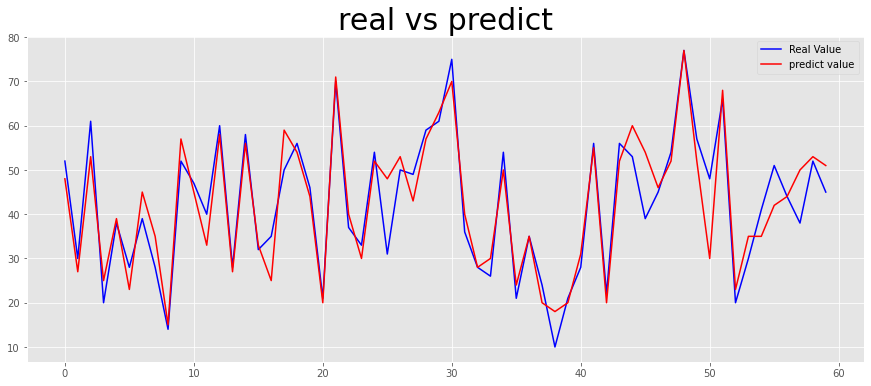

In [45]:
plt.style.use("ggplot")
plt.figure(figsize=(15,6))
plt.plot(y_df[0:60]['target'], color = "b", label="Real Value") # 진짜 값
plt.plot(y_df[0:60]['predict'], color = "r", label ="predict value") # 예측 값 
plt.legend()
plt.title("real vs predict", fontsize=30)
plt.show()

# 모델링 스코어 그래프

In [46]:
LR_DF = pd.DataFrame({'algorithm name': ['rfr r2 score:','xgb r2 score:','ada r2 score:','knn r2 score','cat r2 score'],
                      'Accuracy Score %': [RFR_r2*100,xgb_r2*100,
                                          adaBoost_r2*100,knn_r2*100,
                                          cat_r2*100]})
LR_DF

,algorithm name,Accuracy Score %
0,rfr r2 score:,86.601642
1,xgb r2 score:,84.357176
2,ada r2 score:,54.475525
3,knn r2 score,83.684524
4,cat r2 score,87.688220


In [48]:
LR_DF.sort_values(by='Accuracy Score %',ascending=False)

,algorithm name,Accuracy Score %
4,cat r2 score,87.688220
0,rfr r2 score:,86.601642
1,xgb r2 score:,84.357176
3,knn r2 score,83.684524
2,ada r2 score:,54.475525


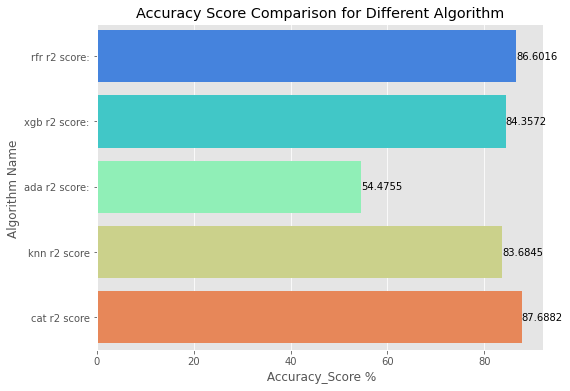

In [49]:
plt.figure(figsize=(8,6))
ax =sns.barplot(y='algorithm name',x='Accuracy Score %',data=LR_DF,palette='rainbow')
ax.set_xlabel( " Accuracy_Score %")
ax.set_ylabel( "Algorithm Name ")
ax.set_title(  "Accuracy Score Comparison for Different Algorithm")
ax.bar_label(ax.containers[0])
plt.show()

In [ ]:
# import joblib # pkl 세이브파일을 만들어주는 라이브러리

# joblib.dump(knn, 'first_model.pkl')

In [ ]:
# from google.colab import files

# files.download('first_model.pkl') # 다운로드